In [34]:
import numpy as np
import os


os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [35]:
import json


version = '1.0.0'
check_data_version = '1.0.3'


with open(f'../create_dataset/v{check_data_version}/label.json', 'r', encoding='utf-8') as file:
    label = json.load(file)
    
word_count = label['label_count'] * 2 - 1

In [36]:
data_dir = f'../create_dataset/v{check_data_version}/data'
data_files_list = os.listdir(data_dir)


data_files_list.sort()


data = np.concatenate([
    np.load(f'{data_dir}/{file}') for file in data_files_list
], axis=0)
np.shape(data)

(7886, 10, 51)

In [37]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)
print(*labels)

(7886, 10, 50)
(7886,)
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0

In [38]:
from tensorflow.keras.utils import to_categorical
from keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=word_count)
y_data.shape

(7886, 17)

In [39]:
from sklearn.model_selection import train_test_split

time_stamp = 1
x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(7097, 10, 50) (7097, 17)
(789, 10, 50) (789, 17)


In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3], return_sequences=False),
    Dense(32, activation='relu'),
    Dense(word_count, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 64)                29440     
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 


 dense_7 (Dense)             (None, 17)                561       
                                                                 
Total params: 32081 (125.32 KB)
Trainable params: 32081 (125.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
check_data_version = check_data_version.replace('.', '')
version = version.replace('.', '')

In [42]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau



history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=200,
    callbacks=[
        ModelCheckpoint(f'../models/data_{check_data_version}_train_{version}_model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/200
200/222 [==========================>...] - ETA: 0s - loss: 34.8017 - acc: 0.2869
Epoch 1: val_acc improved from -inf to 0.61090, saving model to ../models\data_103_train_100_model.h5
222/222 [==============================] - 2s 4ms/step - loss: 31.6413 - acc: 0.3194 - val_loss: 2.0242 - val_acc: 0.6109 - lr: 0.0010
Epoch 2/200
 59/222 [======>.......................] - ETA: 0s - loss: 1.3754 - acc: 0.7076

c:\PYTHON\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


200/222 [==========================>...] - ETA: 0s - loss: 1.0166 - acc: 0.7656
Epoch 2: val_acc improved from 0.61090 to 0.80228, saving model to ../models\data_103_train_100_model.h5
222/222 [==============================] - 1s 3ms/step - loss: 0.9793 - acc: 0.7717 - val_loss: 0.7121 - val_acc: 0.8023 - lr: 0.0010
Epoch 3/200
209/222 [===========================>..] - ETA: 0s - loss: 1.3266 - acc: 0.7576
Epoch 3: val_acc improved from 0.80228 to 0.83904, saving model to ../models\data_103_train_100_model.h5
222/222 [==============================] - 1s 3ms/step - loss: 1.2905 - acc: 0.7609 - val_loss: 0.6256 - val_acc: 0.8390 - lr: 0.0010
Epoch 4/200
205/222 [==========================>...] - ETA: 0s - loss: 0.5382 - acc: 0.8934
Epoch 4: val_acc improved from 0.83904 to 0.96578, saving model to ../models\data_103_train_100_model.h5
222/222 [==============================] - 1s 3ms/step - loss: 0.5103 - acc: 0.8981 - val_loss: 0.1749 - val_acc: 0.9658 - lr: 0.0010
Epoch 5/200
215/222

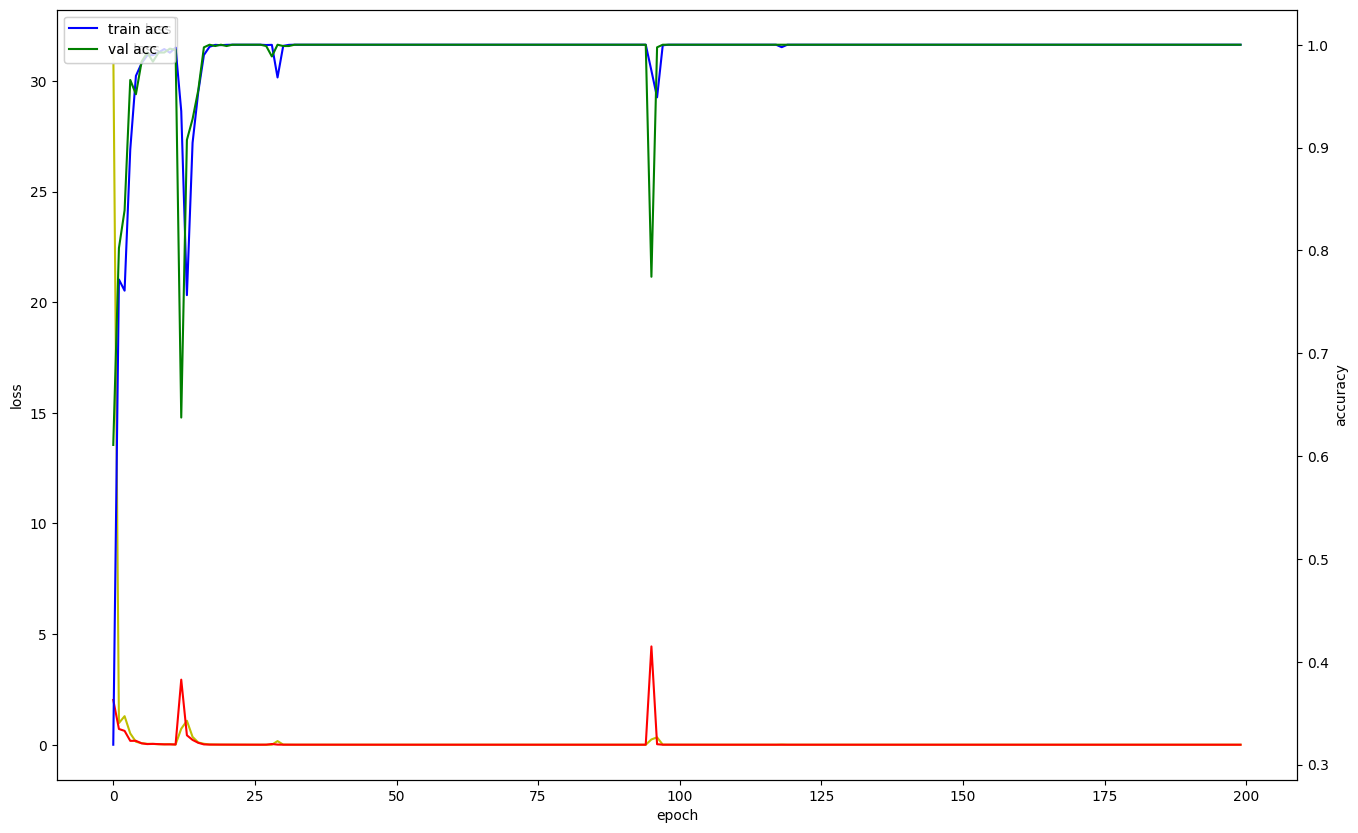

In [43]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.savefig(f'../readme_img/data_{check_data_version}_train_{version}.png')
plt.show()

In [44]:

from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model


model = load_model(f'../models/data_{check_data_version}_train_{version}_model.h5')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

25/25 [==============================] - 0s 1ms/step


array([[[740,   0],
        [  0,  49]],

       [[749,   0],
        [  0,  40]],

       [[737,   0],
        [  0,  52]],

       [[743,   0],
        [  0,  46]],

       [[746,   0],
        [  0,  43]],

       [[735,   0],
        [  0,  54]],

       [[740,   0],
        [  0,  49]],

       [[743,   0],
        [  0,  46]],

       [[738,   0],
        [  0,  51]],

       [[742,   0],
        [  0,  47]],

       [[745,   0],
        [  0,  44]],

       [[739,   0],
        [  0,  50]],

       [[751,   0],
        [  0,  38]],

       [[749,   0],
        [  0,  40]],

       [[742,   0],
        [  0,  47]],

       [[741,   0],
        [  0,  48]],

       [[744,   0],
        [  0,  45]]], dtype=int64)